In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit


In [2]:
df = pd.read_csv('C:/Users/chenj/Desktop/AION/2023/Decay Rate/Repump decay/Both repump decay-0003.csv',skiprows=[1])

In [3]:
df.iloc[:,1] = df.iloc[:,1]+30

In [4]:
df = df[df.iloc[:,0]  <= 1.45]

df.iloc[:,0] = df.iloc[:,0]  * 1000

In [5]:
window_size = 30
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')

In [6]:
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

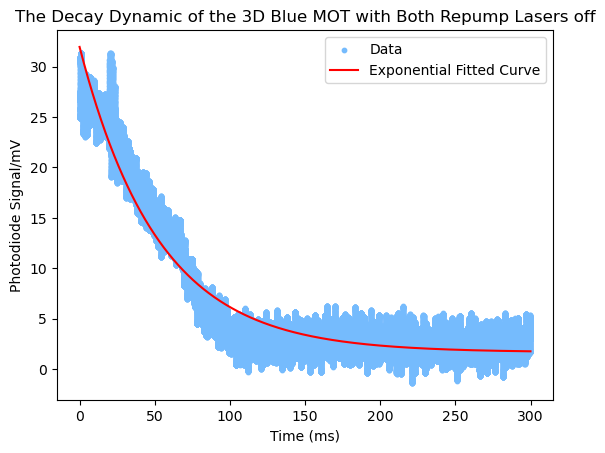

In [7]:
threshold = 1150
# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-1150
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

p0=[4.58245103*10**7, 1.7006444*10**(-2), 2.069870*10**6]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=80000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x, filtered_y,s=10,color = "xkcd:sky blue", label='Data')

plt.plot(filtered_x, y_fit, label='Exponential Fitted Curve', color='red')

plt.xlabel('Time (ms)')
plt.ylabel("Photodiode Signal/mV")
plt.title('The Decay Dynamic of the 3D Blue MOT with Both Repump Lasers off')
plt.legend()

# Show the plot
plt.show()